For this exercise, we will use the wine dataset that is provided by scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). It is a simple multi-label classification dataset.

In [1]:
import sklearn
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = sklearn.datasets.load_wine()

## How many examples are contained in this dataset? How many attributes are contained? What are the attribute names? What datatypes do the individual attributes have? Pick out the values of the attribute “ash”: What is the maximum, minimum, median, and mean value for this attribute?

In [2]:
# Description of the dataset
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Description tells us that there are 178 examples with 13 numeric attributes.
Decription also tells us that the attribute “ash” has maximum 1.36 minimum 3.23 and mean 2.36.

In [3]:
#names of the 13 attributes
print('names of the 13 attributes: ', data['feature_names'])

names of the 13 attributes:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
#convert it to dataframe 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

## Look at the label attribute: How many classes does this attribute have? How many examples are associated to each of the classes?

In [5]:
#there are 3 classes
print('names of classes: ', data.target_names)

names of classes:  ['class_0' 'class_1' 'class_2']


In [6]:
#number of examples in each class
print('number of examples in each class:', '\n', df.label.value_counts(normalize=False))

number of examples in each class: 
 1    71
0    59
2    48
Name: label, dtype: int64


## Take the attribute “ash” and visualize the values as a discrete histogram. Assume a number of 10 bins for the visualization. Display the value range of each bin on the x-axis of the plot.

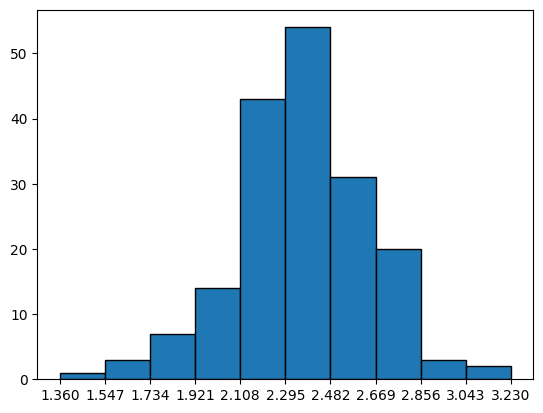

In [7]:
#Histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df['ash'], bins=10, edgecolor='black')
ax.set_xticks(bins)
plt.show()

## Additionally, visualize the data of the attribute “ash” in a boxplot. What does this say about the data range?

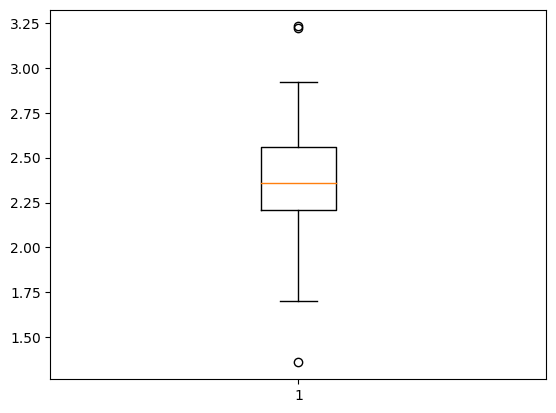

In [8]:
plt.boxplot(df['ash'])
plt.show()

## Create a new attribute:
## • Create a new attribute “substracted_phenols” by subtracting the values of “nonflavanoid_phenols” from the values of “total_phenols”.
## • Increase all values of the attribute “alcohol” by 1.0.

In [9]:
df_mod = df.copy()

df_mod["substracted_phenols"] = df_mod["total_phenols"] - df_mod["nonflavanoid_phenols"]

df_mod["alcohol"] = df_mod["alcohol"] + 1

## • Shuffle the data.
## • Augment the dataset by creating 20 more examples that are derived from real examples. Therefore, select 20 random examples from the original dataset and apply Gaussian noise (mean = 0 and std. dev. = 1) to those examples. Finally, add the examples to the dataset.

In [10]:
df_mod = sklearn.utils.shuffle(df_mod, random_state=20)

random_examples = df_mod.sample(n = 20, random_state=0)
noise = np.random.normal(0, 1, [20,15]) 
new_examples = random_examples + noise
df_mod = pd.concat([df_mod, new_examples], ignore_index=True, sort=False)

## Training preparation:
## • Scale the data of the attribute “ash” to the range [0,1] with one of the scalers of scikit-learn.

In [11]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
df_mod['ash'] = min_max_scaler.fit_transform(df_mod[['ash']])

## Take the original wine data from the first example
## Transform the problem to a binary classification task by combining labels of class 1 and 2. Name the resulting labels class-0 and not-class-0

In [13]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df.loc[df.label!=0,'label']='not-class-0'
df.loc[df.label==0,'label']='class-0'

## Split the original data in a training set and a test set with a training ratio of 0.85.

In [14]:
data_X = df.drop('label', axis=1)
data_y = df['label']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, data_y, test_size=0.15, random_state=1)

## After that, train a classifier of your choice with the training data.

In [15]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Compute the accuracy of this classifier with the examples from the test set and compute the confusion matrix.

In [16]:
print('Accuracy:', sklearn.metrics.accuracy_score(predictions, y_test))
print('Confusion Matrix:\n', sklearn.metrics.confusion_matrix(predictions, y_test))

Accuracy: 0.9259259259259259
Confusion Matrix:
 [[10  1]
 [ 1 15]]


Accuracy of 0.9259 means that around 92,6% of entries were classified right, 10 true positives and 15 true negatives, 1 false positive and 1 false negative.

## Take the modified wine data and repeat all classification steps

In [17]:
df_mod.loc[df_mod.label!=0,'label']='not-class-0'
df_mod.loc[df_mod.label==0,'label']='class-0'

data_X_mod = df_mod.drop('label', axis=1)
data_y_mod = df_mod['label']

X_train_mod, X_test_mod, y_train_mod, y_test_mod = sklearn.model_selection.train_test_split(data_X_mod, data_y_mod, test_size=0.15, random_state=1)

model_mod = sklearn.tree.DecisionTreeClassifier()

model_mod.fit(X_train_mod, y_train_mod)
predictions_mod = model_mod.predict(X_test_mod)

accuracy = sklearn.metrics.accuracy_score(predictions_mod, y_test_mod)

print('Accuracy for modified data:', sklearn.metrics.accuracy_score(predictions_mod, y_test_mod))
print('Confusion Matrix for modified data:\n', sklearn.metrics.confusion_matrix(predictions_mod, y_test_mod))

Accuracy for modified data: 0.9333333333333333
Confusion Matrix for modified data:
 [[10  0]
 [ 2 18]]


Accuracy improved to 0.933 so the data transformation was helpful, but since we added 20 more examples the direct comparison may not make sense